# JCT 固定複数裏付け

## 設定

In [6]:
import sys
sys.path.append('../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import StableTransaction
from scripts.price_data.get_price import GetPriceData

price_getter = GetPriceData()

from pprint import pprint

### JCT ポートフォリオ

In [17]:
# a. 国内出来高
jct_portfolio_a = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '6178.T': {
        'num': 100000,
        'is_usd': False
    },
    '8306.T': {
        'num': 100000,
        'is_usd': False
    },
    '8604.T': {
        'num': 100000,
        'is_usd': False
    }
}

# b. 円安（GAFAM）
jct_portfolio_b = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# c. グロース（マザーズ）
jct_portfolio_c = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# d. 時価総額上位
jct_portfolio_d = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '9984.T': {
        'num': 10000,
        'is_usd': False
    },
    '6098.T': {
        'num': 10000,
        'is_usd': False
    },
    '6758.T': {
        'num': 5000,
        'is_usd': False
    }
}

# e. ボラティリティ
jct_portfolio_e = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 50000,
        'is_usd': False
    },
    'IVV': {
        'num': 300,
        'is_usd': True
    }
}

### ST ポートフォリオ

In [18]:
# a. 国内出来高
st_portfolio_a = {
    '7203.T': {
        'num': 70000,
        'is_usd': False
    },
    '9501.T': {
        'num': 200000,
        'is_usd': False
    },
    '4689.T': {
        'num': 120000,
        'is_usd': False
    }
}

# b. 円安（GAFAM）
st_portfolio_b = {
    'GOOGL': {
        'num': 150,
        'is_usd': True
    },
    'AMZN': {
        'num': 150,
        'is_usd': True
    },
    'FB': {
        'num': 1500,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
    'MSFT': {
        'num': 2000,
        'is_usd': True
    },
}

# c. グロース（マザーズ）
st_portfolio_c = {
    '4385.T': {
        'num': 10000,
        'is_usd': False
    },
    '4477.T': {
        'num': 100000,
        'is_usd': False
    },
    '2158.T': {
        'num': 15000,
        'is_usd': False
    },
    '3994.T': {
        'num': 10000,
        'is_usd': False
    }
}

# d. 時価総額上位
st_portfolio_d = {
    '7203.T': {
        'num': 65000,
        'is_usd': False
    },
    '9983.T': {
        'num': 1000,
        'is_usd': False
    },
    '6861.T': {
        'num': 1000,
        'is_usd': False
    }
}

# e. ボラティリティ
st_portfolio_e = {
    'TSLA': {
        'num': 750,
        'is_usd': True
    },
    'NVDA': {
        'num': 2000,
        'is_usd': True
    },
    '6195.T': {
        'num': 100000,
        'is_usd': False
    },
    '6920.T': {
        'num': 2500,
        'is_usd': False
    }
}

## シミュレーション（不足時現金自動補填）

In [10]:
from datetime import date, timedelta

def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = StableTransaction(jct_portfolio_A, st_portfolio_A, date(2021, 10, 1), lender_loan_ratio=1.05, print_log=True, auto_deposit=True)


print('Start simulation...')
print('='*50)
for date in date_range(date(2021, 10, 2), date(2021, 10, 31)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')

{'JPY': {'num': 100000000, 'is_usd': False}, '6178.T': {'num': 100000, 'is_usd': False}, '8306.T': {'num': 100000, 'is_usd': False}, '8604.T': {'num': 100000, 'is_usd': False}} {'7203.T': {'num': 70000, 'is_usd': False}, '9501.T': {'num': 200000, 'is_usd': False}, '4689.T': {'num': 120000, 'is_usd': False}} 2021-10-01
("JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False}, '6178.T': "
 "{'num': 100000, 'is_usd': False}, '8306.T': {'num': 100000, 'is_usd': "
 "False}, '8604.T': {'num': 100000, 'is_usd': False}}")
("ST portfolio: {'7203.T': {'num': 70000, 'is_usd': False}, '9501.T': {'num': "
 "200000, 'is_usd': False}, '4689.T': {'num': 120000, 'is_usd': False}}")
2021-10-01: Price updating...
7203.T: 1967.0
9501.T: 321.0
4689.T: 717.0
2021-10-01: Price updating...
JPY: 1.0
6178.T: 929.5
8306.T: 640.0
8604.T: 543.7
Transaction is made.
{'auto_deposit': False,
 'borrower_jct_num': 8993500,
 'date': datetime.date(2021, 10, 1),
 'jct_diff_num': 0,
 'jct_total_num': 311320000,
 'lende

2021-10-15: Price updating...
7203.T: 1993.5
9501.T: 357.0
4689.T: 687.7
2021-10-15: Price updating...
JPY: 1.0
6178.T: 925.5
8306.T: 657.0
8604.T: 557.4
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': False,
 'borrower_jct_num': 5847550,
 'date': datetime.date(2021, 10, 15),
 'jct_diff_num': 3000000,
 'jct_total_num': 313990000,
 'lender_jct_num': 308142450,
 'moved_jct_num': -273000,
 'st_total_value': 293469000.0}
2021-10-16
2021-10-16: Price updating...
7203.T: 2040.0
9501.T: 354.0
4689.T: 692.0
2021-10-16: Price updating...
JPY: 1.0
6178.T: 911.5
8306.T: 660.4
8604.T: 560.2
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': False,
 'borrower_jct_num': 1738000,
 'date': datetime.date(2021, 10, 16),
 'jct_diff_num': -780000,
 'jct_total_num': 313210000,
 'lender_jct_num': 311472000,
 'moved_jct_num': 3329550,
 'st_total_value': 296640000.0}
2021-10-17
2021-10-17: Price updating...
7203.T: 2040.0
9501.T: 354.0
4689.T: 692.0
2021-10-17: Price updating.

7203.T: 2050.0
9501.T: 321.0
4689.T: 718.2
2021-10-30: Price updating...
JPY: 1.0
6178.T: 864.0
8306.T: 640.0
8604.T: 515.2
Additional deposit! 663750 JPY is added.
Additional deposit! 5994450 JPY is added.
OK. JCT is properly issued or deleted and moved.
{'auto_deposit': True,
 'borrower_jct_num': 0,
 'date': datetime.date(2021, 10, 30),
 'jct_diff_num': -2830000,
 'jct_total_num': 308578200,
 'lender_jct_num': 308578200,
 'moved_jct_num': 5994450,
 'st_total_value': 293884000.0}
Finished.


## ログの可視化

In [11]:
logs = transaction.logs
date_list = [log['date'] for log in logs]
st_total_value_list = [log['st_total_value'] for log in logs]
jct_total_num_list = [log['jct_total_num'] for log in logs]
borrower_jct_num_list = [log['borrower_jct_num'] for log in logs]
lender_jct_num_list = [log['lender_jct_num'] for log in logs]
jct_diff_num_list = [log['jct_diff_num'] for log in logs]
moved_jct_num_list = [log['moved_jct_num'] for log in logs]
deposit_bool_list = [log['auto_deposit'] for log in logs]

date_auto_deposit = []
for i, x in enumerate(deposit_bool_list):
    if x:
        date_auto_deposit.append(date_list[i])

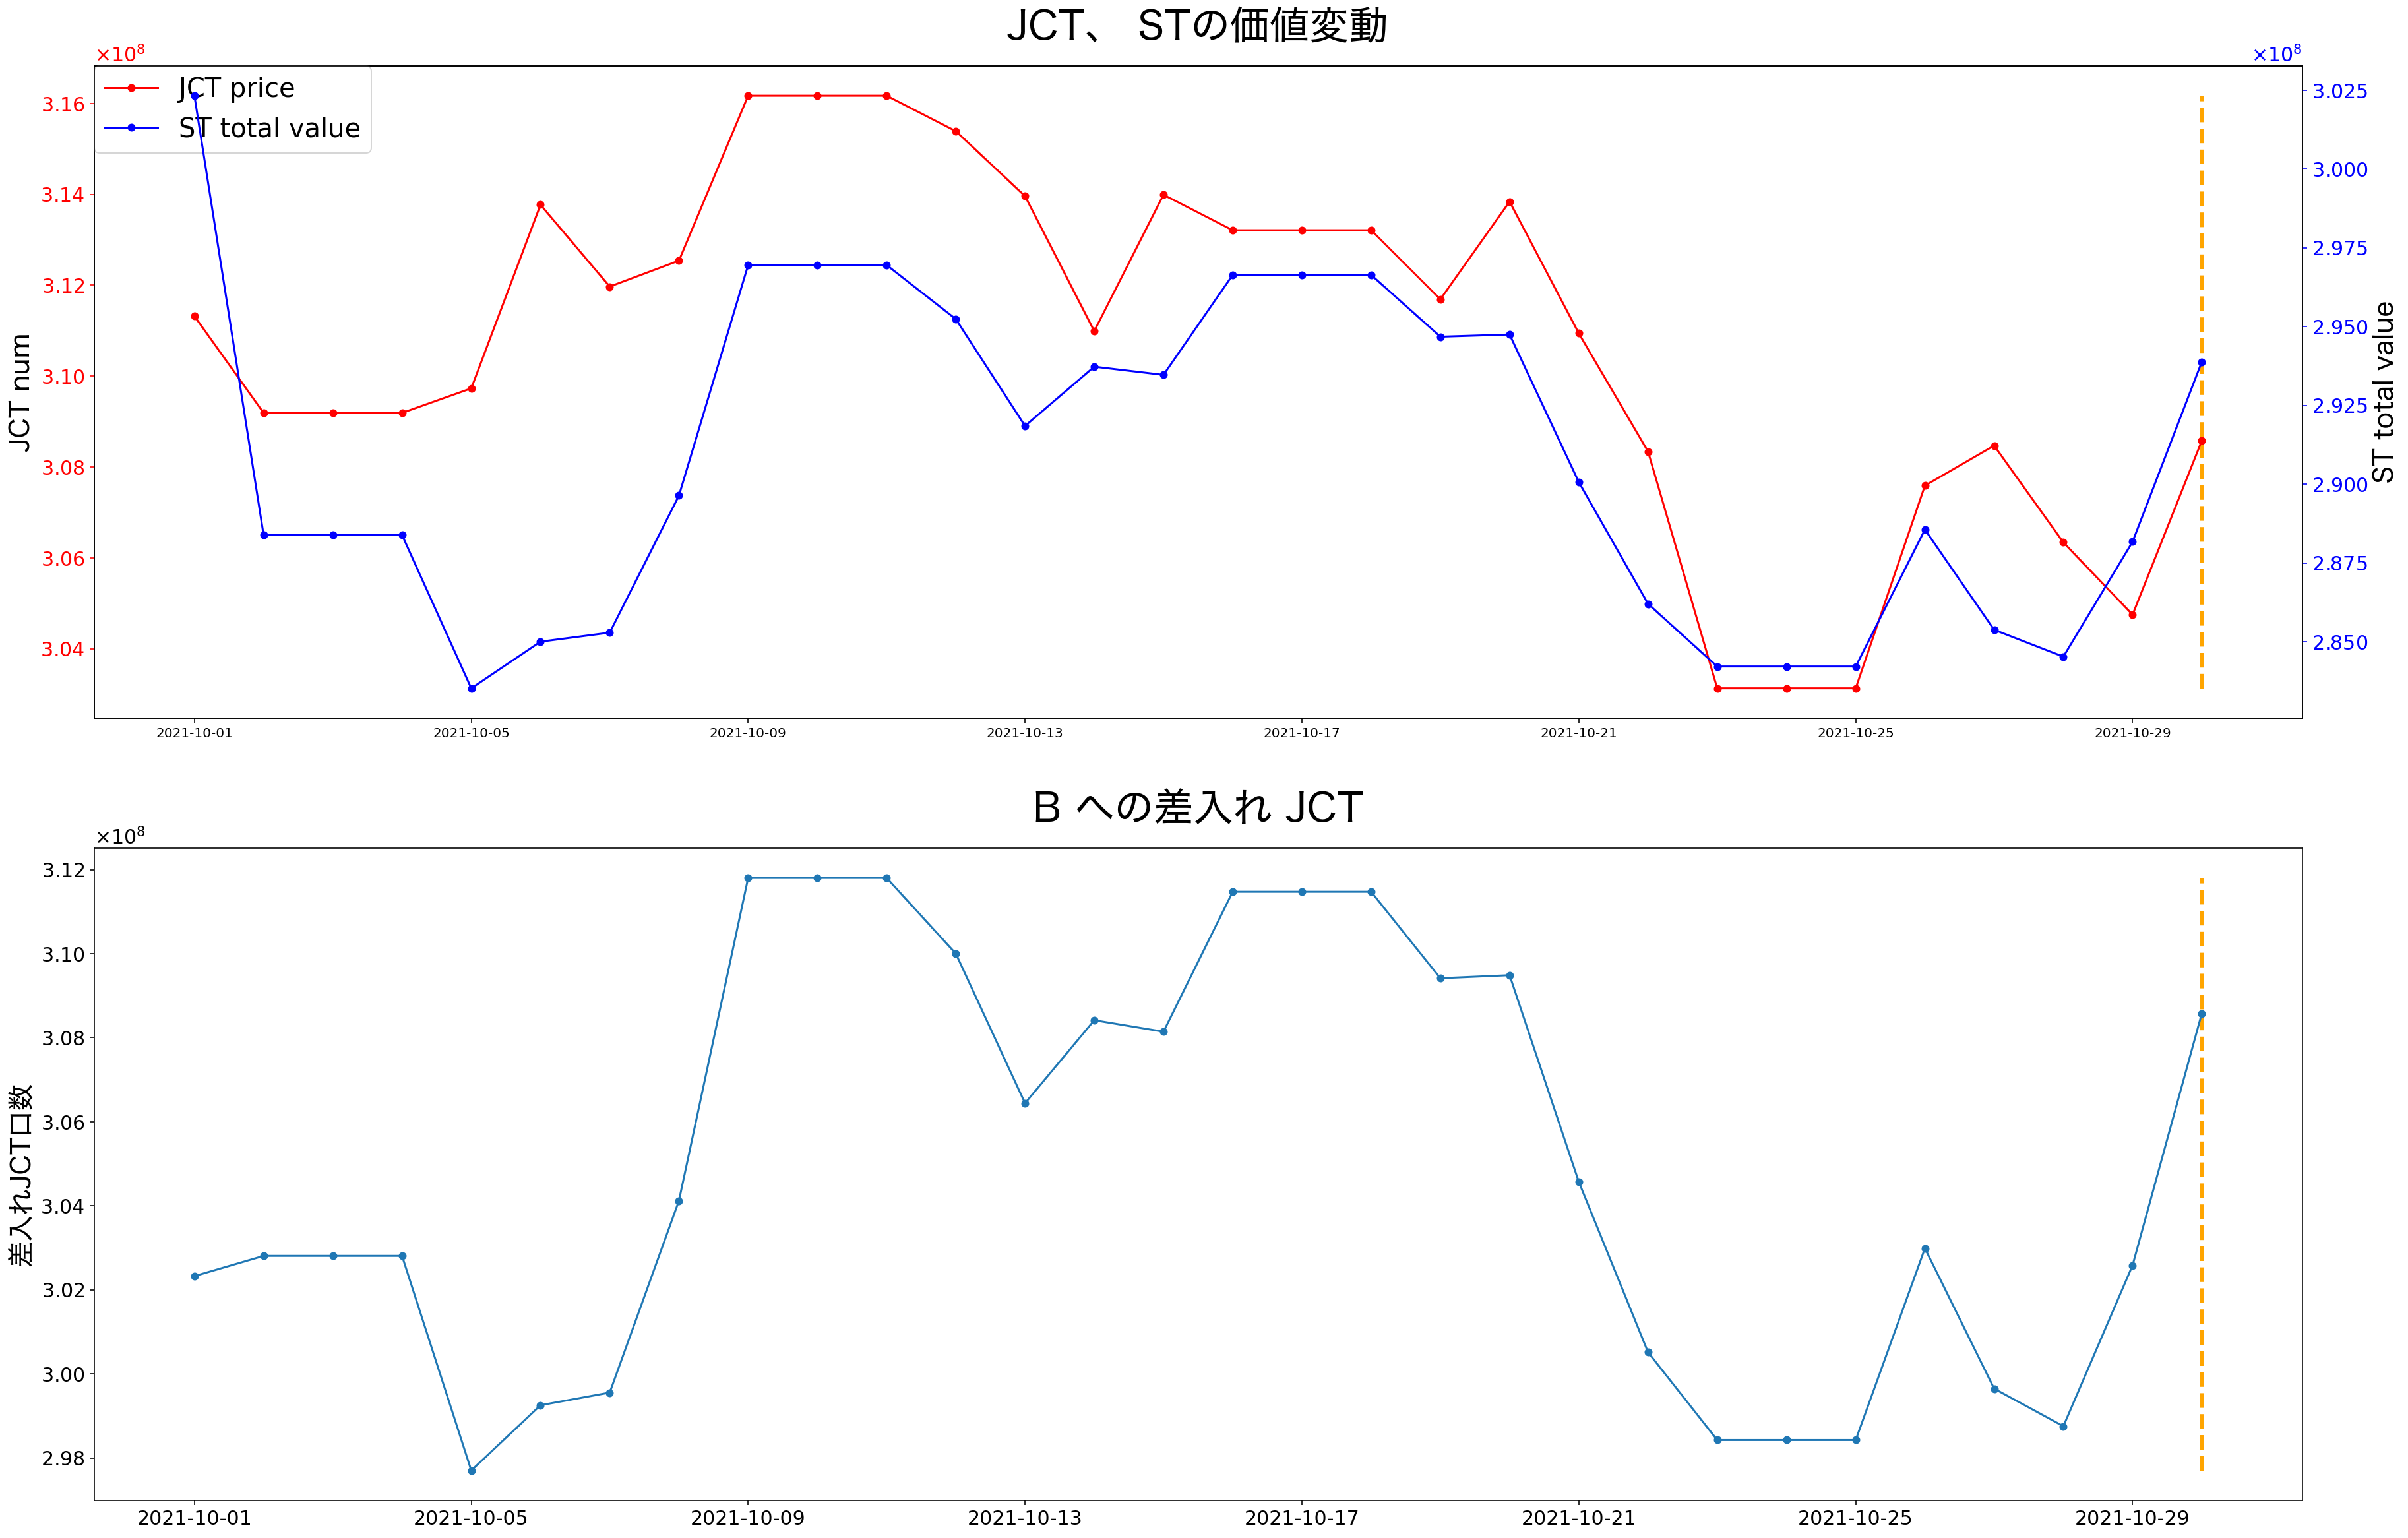

In [12]:
fig = plt.figure(figsize=(30,20))
# fig, ax1 = plt.subplots(figsize=(20,10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_total_num_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT num', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)
ax1.vlines(date_auto_deposit, min(jct_total_num_list), max(jct_total_num_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5)
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('B への差入れ JCT', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

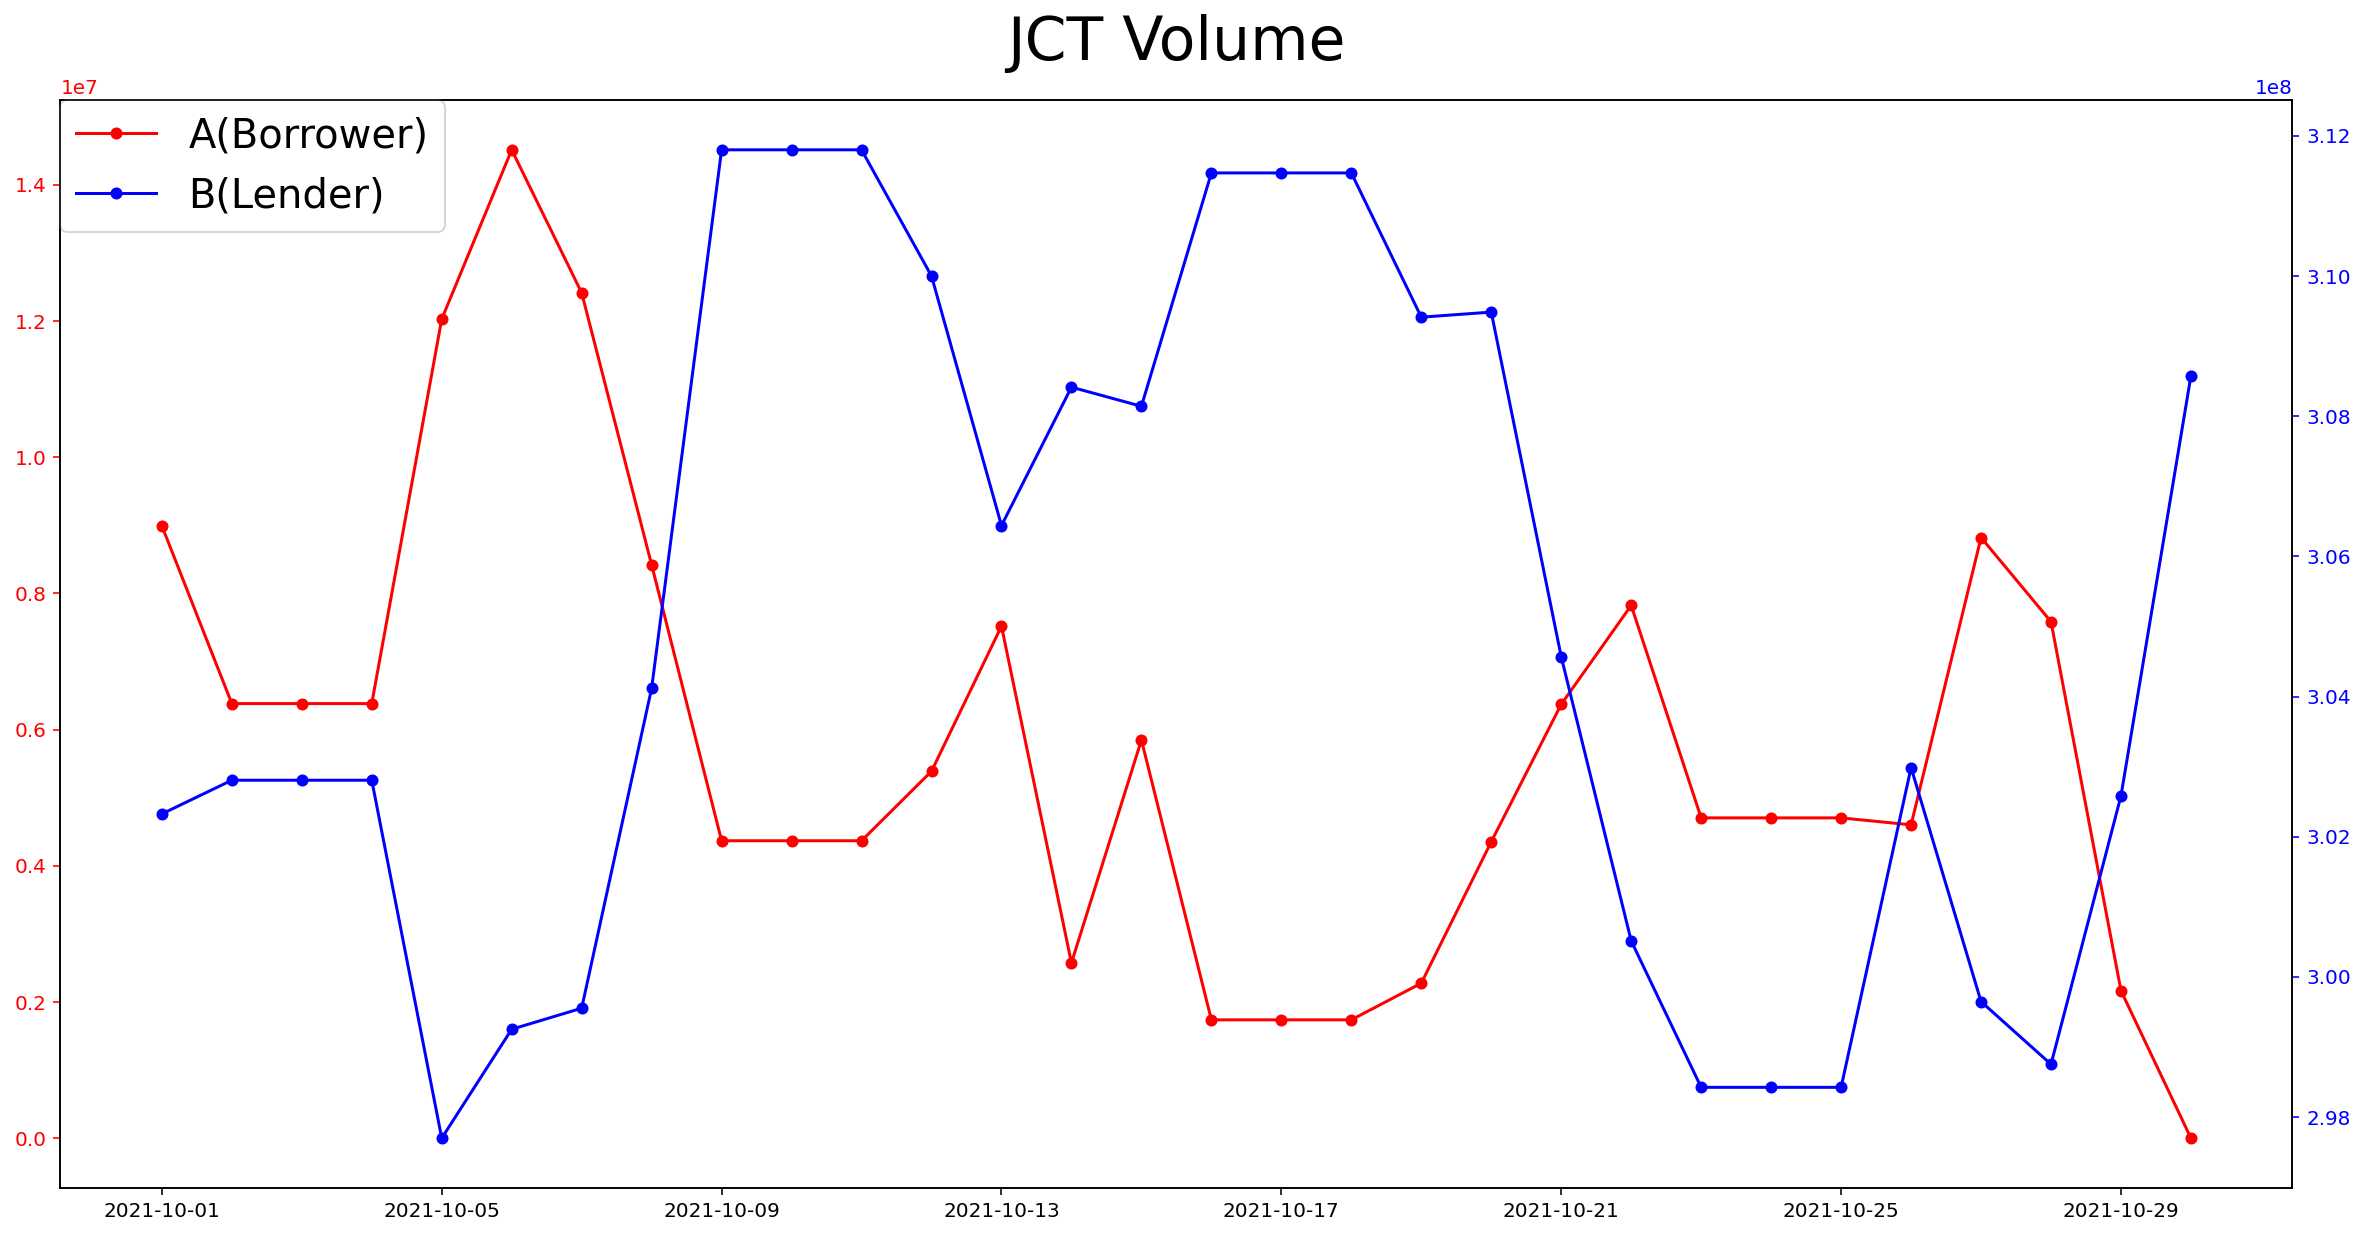

In [13]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

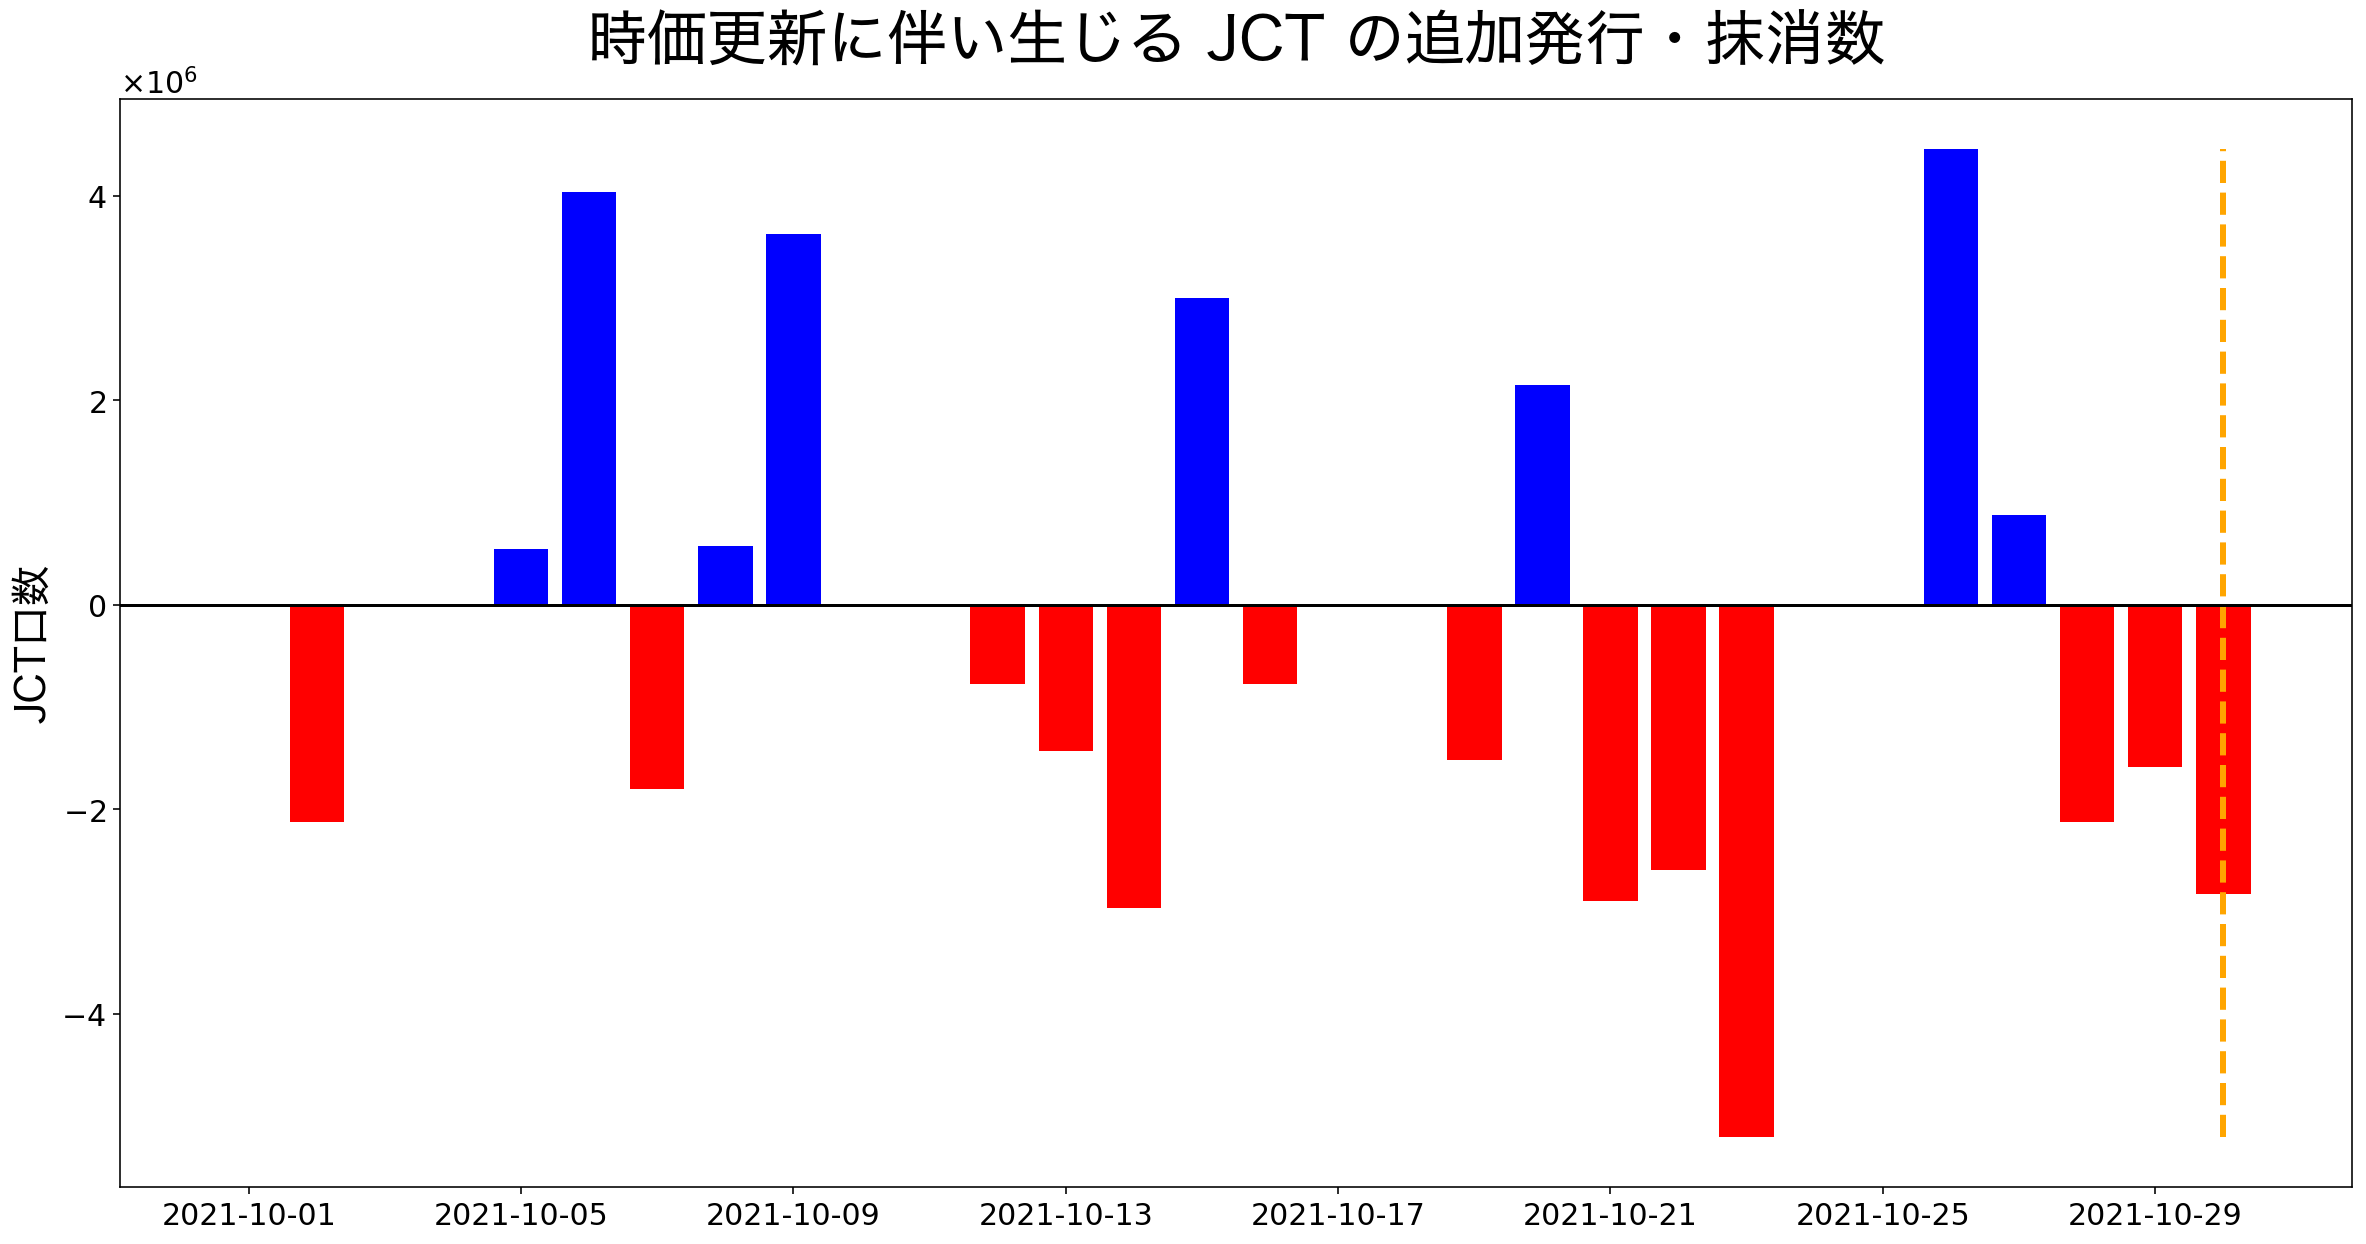

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
ax.set_title('時価更新に伴い生じる JCT の追加発行・抹消数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(jct_diff_num_list), max(jct_diff_num_list), color='orange', linestyle='dashed', linewidth=3)

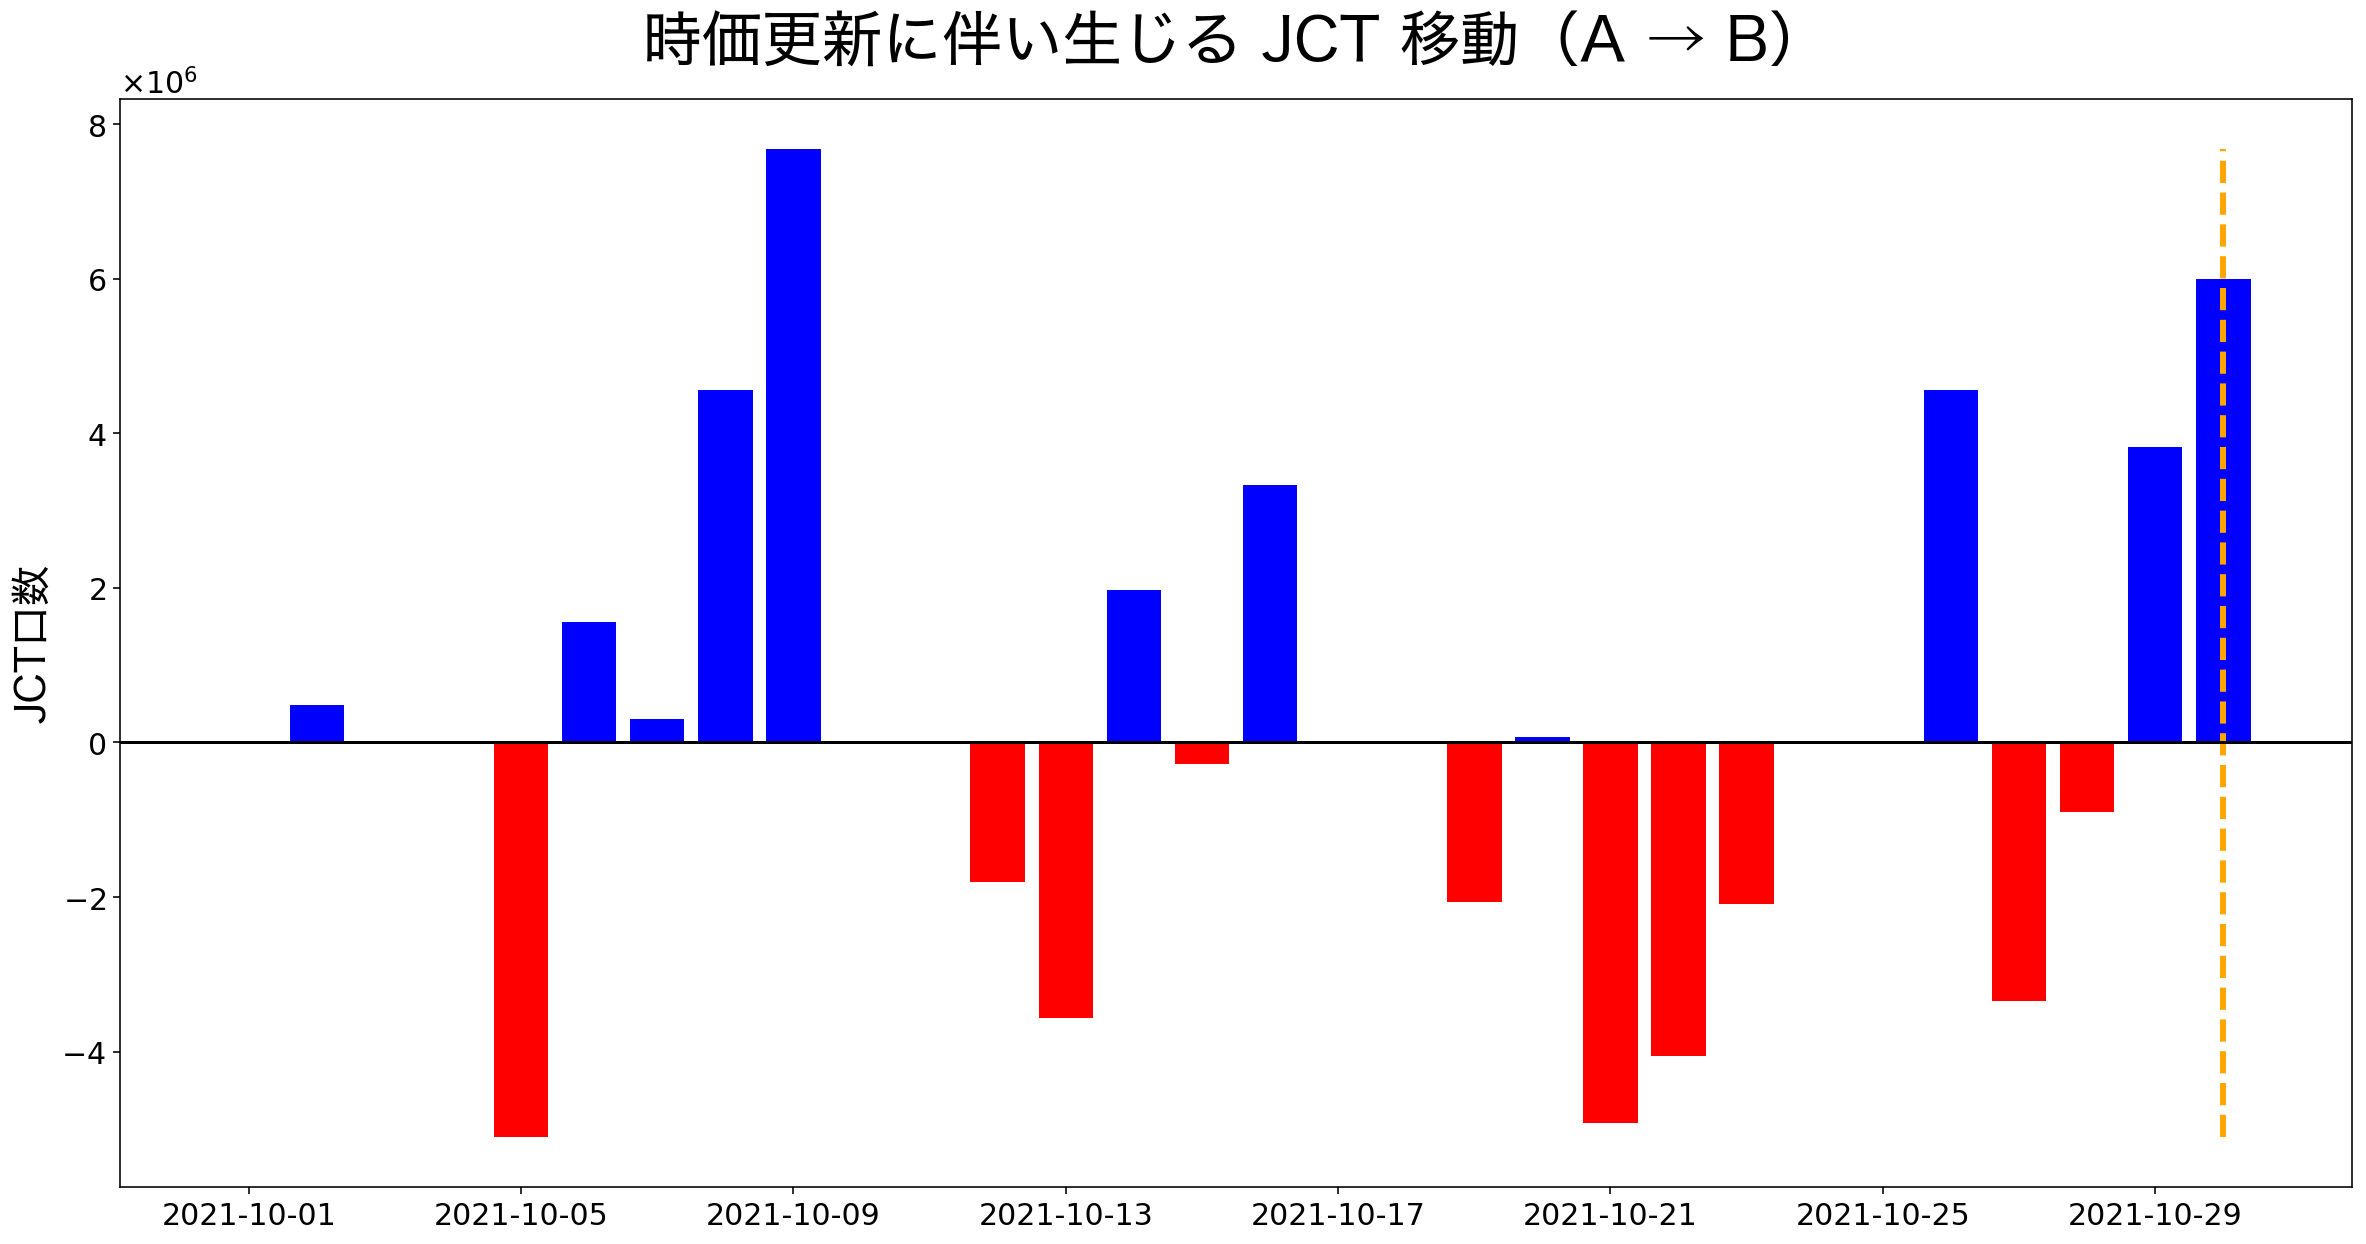

In [15]:
fig, ax = plt.subplots(figsize=(20,10))
moved_jct_num_color = ['blue' if diff > 0 else 'red' for diff in moved_jct_num_list]

ax.bar(date_list, moved_jct_num_list, color=moved_jct_num_color)
ax.set_title('時価更新に伴い生じる JCT 移動（A → B）', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT口数', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(moved_jct_num_list), max(moved_jct_num_list), color='orange', linestyle='dashed', linewidth=3)